In [1]:
%matplotlib inline

from os import chdir, getcwd
ROOTF = 'LRGSLRG_obj.frames_dynsys-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


## Square lattice

In [2]:
side = 100
#
theLattice = Lattice2D(#
    side1 = side,
    geometry = 'squared',
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = theLattice,
    pflip = 0.001,
    t_steps = 10,
    no_obs = 200
)
SLRG_obj.init_weights()
#
# neg_weightsG = {((i, j), (i, j+1)): -1 for i in range(SLRG_obj.system.side1) for j in [SLRG_obj.system.side2//3, SLRG_obj.system.side2//2]}
# SLRG_obj.flip_sel_edges(neg_weightsG, 'G')
#
# SLRG_obj.flip_sel_edges()
SLRG_obj.flip_random_fract_edges()
#
# fig, ax = plt.subplots(figsize=(8, 8))
# nx.draw(theLattice.G, 
#         pos=theLattice.posG, 
#         ax=ax,  
#         edge_color=['blue' if e[2] > 0 else 'red' for e in SLRG_obj.system.G.edges(data='weight')], 
#         node_color='k',  
#         node_size=15,
#         with_labels=False)
# plt.show()

In [9]:
SLRG_obj.initCond = 'window_multiple_1'
SLRG_obj.laplacian_dynamics_init(
    window_size=1, 
    window_shift_y=0,
    window_shift_x=0)
initial_state = SLRG_obj.status_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)
SLRG_obj.compute_k_eigvV(howmany=1)
eigen_state = SLRG_obj.eigV.T[0].reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)
eigv0 = SLRG_obj.eigv[0]

1 [ 1 -1] [[25 48]] [   0    1    2 ... 4722 4723 4724]


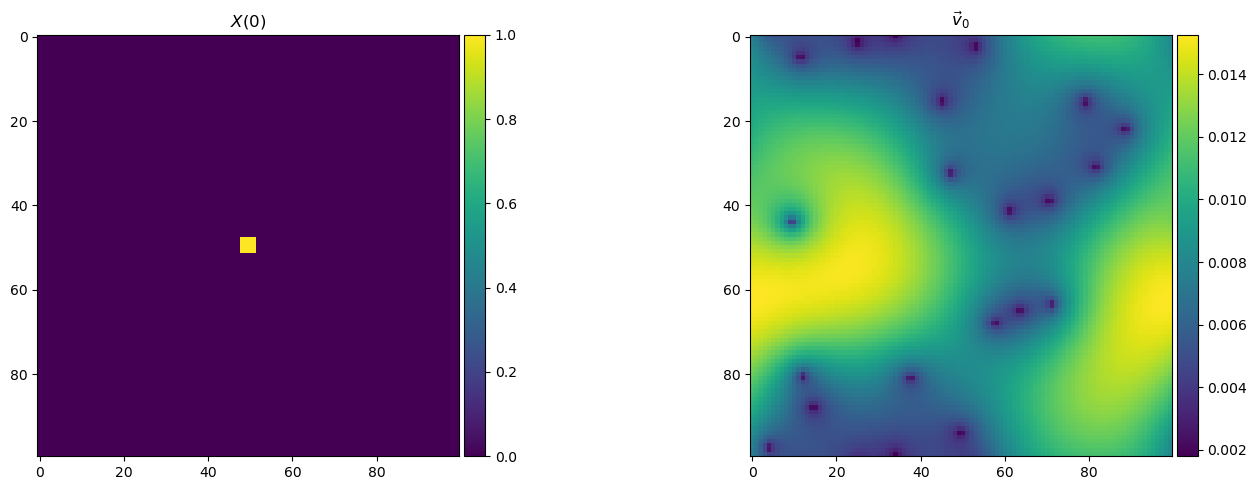

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# Plot the data using imshow and add colorbars
im1 = axs[0].imshow(initial_state)
axs[0].set_title(r'$X(0)$')
if np.mean(initial_state)*np.mean(eigen_state) < 0:
    eigen_state = -eigen_state
im3 = axs[1].imshow(eigen_state)
axs[1].set_title(r'$\vec{v}_0$')
# Create colorbars on the right side of each subplot
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
colorbar1 = plt.colorbar(im1, cax=cax1)
divider3 = make_axes_locatable(axs[1])
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
colorbar3 = plt.colorbar(im3, cax=cax3)
fig.tight_layout()

In [31]:
N = 300
L = 10
wndwS = 2
nsquares = 3
wndwSa = np.array([wndwS, -wndwS])
sqTmp = np.random.randint(wndwS, L-wndwS, size=(nsquares, 2))
sqIdx = np.concatenate([
                    np.concatenate([
                        [j+i*L
                         for j in range(iSq[0])] 
                         for i in range(iSq[1])]) 
                    for iSq in sqTmp])
# sqIdx = np.concatenate([wndwSa
#                     np.concatenate([
#                         [j+i*L
#                          for j in range(iSq[0])] 
#                          for i in range(iSq[1])]) 
#                     for iSq in sqTmp])
# initStatus = np.zeros(N)
sqTmp

array([[3, 7],
       [4, 4],
       [6, 2]])

In [45]:
original_array = np.array([[5, 9],
                           [1, 4],
                           [7, 2]])

# Calculate the new values using broadcasting
values = np.stack((original_array, original_array + 2), axis=2)
indices = np.stack((np.arange(2), np.arange(2) + 2), axis=0)

# Combine values and indices
new_array = np.stack((values, indices), axis=2)

print("Original array:")
print(original_array)

print("\nNew array:")
print(new_array)

ValueError: all input arrays must have the same shape

In [53]:
values, values.transpose(0, 2, 1)

(array([[[ 5,  7],
         [ 9, 11]],
 
        [[ 1,  3],
         [ 4,  6]],
 
        [[ 7,  9],
         [ 2,  4]]]),
 array([[[ 5,  9],
         [ 7, 11]],
 
        [[ 1,  4],
         [ 3,  6]],
 
        [[ 7,  2],
         [ 9,  4]]]))

In [28]:
a = np.zeros(N)
a[sqTmp] = 1

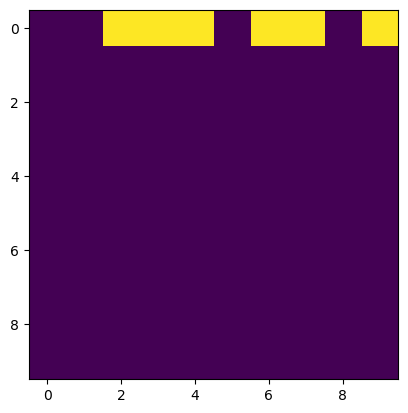

In [22]:
plt.imshow(a.reshape((L, L)))

In [6]:
SLRG_obj.sampling = 1
SLRG_obj.run_laplacian_dynamics(
    saveFrames=True)
print(SLRG_obj.sampling)
final_state = SLRG_obj.status_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)

Beginning Laplacian dynamics.


  6%|▌         | 6211/100000 [00:01<00:19, 4744.42it/s]

Convergence reached.
1


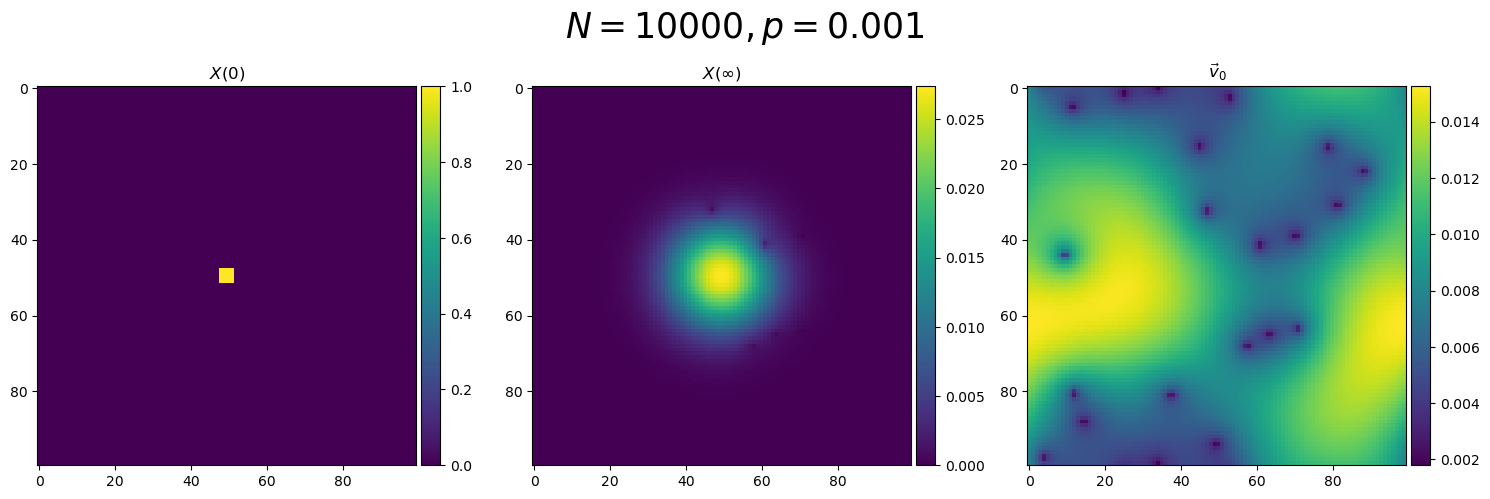

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the data using imshow and add colorbars
im1 = axs[0].imshow(initial_state)
axs[0].set_title(r'$X(0)$')

im2 = axs[1].imshow(final_state)
axs[1].set_title(r'$X(\infty)$')

if np.mean(initial_state)*np.mean(eigen_state) < 0:
    eigen_state = -eigen_state
im3 = axs[2].imshow(eigen_state)
axs[2].set_title(r'$\vec{v}_0$')

# Create colorbars on the right side of each subplot
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
colorbar1 = plt.colorbar(im1, cax=cax1)

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
colorbar2 = plt.colorbar(im2, cax=cax2)

divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
colorbar3 = plt.colorbar(im3, cax=cax3)
fig.suptitle(fr'$N={SLRG_obj.system.N}, p={SLRG_obj.pflip}$', fontsize=25)
fig.tight_layout()

/tmp/ipykernel_3360/2765382166.py:2: RuntimeWarning: divide by zero encountered in log10
  phi_plot = np.log10(np.max(status)-status)
/tmp/ipykernel_3360/2765382166.py:4: RuntimeWarning: divide by zero encountered in log10
  phi_plot2 = np.log10(phi_plot3)


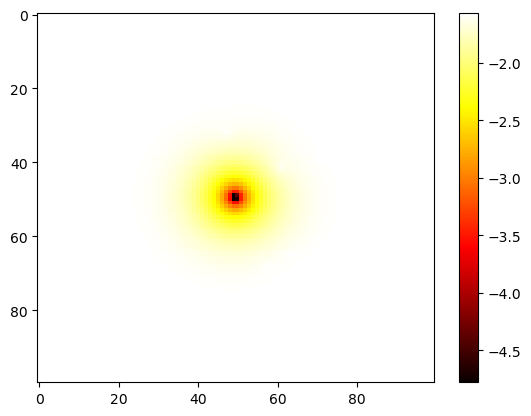

In [8]:
status = SLRG_obj.status_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)
phi_plot = np.log10(np.max(status)-status)
phi_plot3 = np.max(status)-status
phi_plot2 = np.log10(phi_plot3)
phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
phi_plot = np.nan_to_num(phi_plot, posinf=np.max(phi_plot_nnans), neginf=np.min(phi_plot_nnans))
im1 = plt.imshow(phi_plot, cmap=plt.cm.hot, aspect="auto")
plt.colorbar()

In [ ]:
status = status_array.reshape(L, L)/status_array.sum()
halfsize = L//2
hcut_halfsize = status[halfsize, :]
vcut_halfsize = status[:, halfsize]
critrad = np.sqrt(1.128/(3.14*0.103))
ball_halfsizeM = halfsize+1-critrad
ball_halfsizeP = halfsize+1+critrad

In [1]:
xfmt = ScalarFormatter(useMathText=True)
xfmt.set_powerlimits((-7,-2))  

fig, ax2 = plt.subplots(figsize=(10, 8))
ax2.set_xlabel("$x_1$")
ax2.set_ylabel(r"$\phi(\infty) - \phi(x_1, L/2, t=\infty)$", color='blue')
#
ax2.plot(np.max(hcut_halfsize)-hcut_halfsize, 'bo')
# ax2.plot(np.max(vcut_halfsize)-vcut_halfsize, 'o')
ax3 = ax2.twinx()
ax3.plot(hcut_halfsize, 'ro')
# ax3.set_yticklabels([])
ax2.axvline(ball_halfsizeM, **axvline_cr)
ax2.axvline(ball_halfsizeP, **axvline_cr)
#
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", **cax_dict)
cax2.axis('off')
#
trans = ax2.get_xaxis_transform()
ax2.text(ball_halfsizeM, 1.01, r'$L/2 \pm r_{\rm c}$', color='red', horizontalalignment='center', transform=trans)

ax3.set_ylabel(r"$\phi(x_1, L/2, t=\infty)$", color='red')

ax3.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))
ax3.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')
#
ax2.set_yscale('log')
# aspect_ratio = ax1.get_data_ratio() / ax2.get_data_ratio()
# box_ratio = 1.0
# ax2.set_aspect(aspect_ratio)
# ax1.set_xlim([30, 70])
# ax1.set_ylim([30, 70])

phi_asym = np.max(hcut_halfsize) - hcut_halfsize[L//2:]
x = np.linspace(0, len(phi_asym), num=len(phi_asym))

idx = np.where(phi_asym < 1e-17)[0][0]
params, cov = curve_fit(line, x[:idx], np.log(phi_asym[:idx]))


ax2.axvline(ball_halfsizeM, **axvline_cr)
ax2.axvline(ball_halfsizeP, **axvline_cr)
# plt.plot(x, phi_asym, 'o')
ax2.plot(x[:idx]+50, np.exp(line(x[:idx], *params)), label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
ax2.plot(x[:idx]+50, np.exp(line(x[:idx], -1/(critrad), params[1])), label=rf"theo, $r_{{\rm c}} = {critrad:.2f}$")
ax2.legend(loc=[0.1, 0.7])
fig.tight_layout(pad=5.0)
fig.savefig(r"fit.pdf", bbox_inches='tight', transparent=True)

NameError: name 'SLRG_obj' is not defined

In [8]:
status[48:52, 48:52], phi_plot[48:52, 48:52], phi_plot2[48:52, 48:52], phi_plot3[48:52, 48:52]

(array([[24109978.40089348, 24109978.40474973, 24109978.40474972,
         24109978.40089347],
        [24109978.40474973, 24109978.40876344, 24109978.40876343,
         24109978.40474972],
        [24109978.40474973, 24109978.40876344, 24109978.40876343,
         24109978.40474973],
        [24109978.40089348, 24109978.40474973, 24109978.40474973,
         24109978.40089347]]),
 array([[-2.10402754, -2.39645364, -2.39645323, -2.10402713],
        [-2.39645404, -8.42883988, -8.42883988, -2.39645323],
        [-2.39645404, -8.42883988, -8.42883988, -2.39645364],
        [-2.10402733, -2.39645404, -2.39645364, -2.10402713]]),
 array([[-2.10402754, -2.39645364, -2.39645323, -2.10402713],
        [-2.39645404,        -inf, -8.42883988, -2.39645323],
        [-2.39645404,        -inf, -8.42883988, -2.39645364],
        [-2.10402733, -2.39645404, -2.39645364, -2.10402713]]),
 array([[7.86995888e-03, 4.01371345e-03, 4.01371717e-03, 7.86996633e-03],
        [4.01370972e-03, 0.00000000e+00, 3.7

# of frames:  537


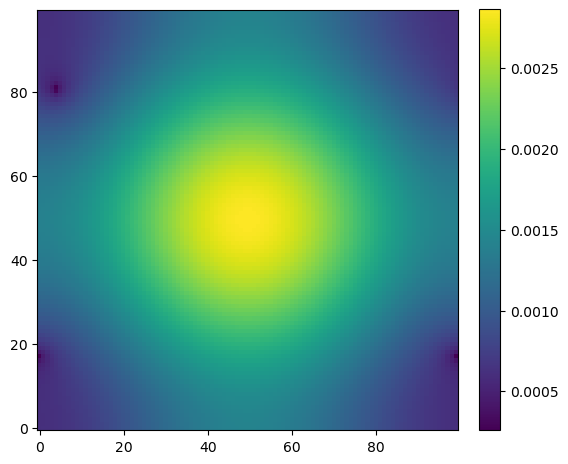

In [18]:
make_animation_fromFrames(SLRG_obj.frames_dynsys[::100], fps=10, savename="prova5.mp4")

In [17]:
.__len__()

537

In [ ]:

# Create a random matrix for plotting
np.random.seed(42)
matrix = np.random.rand(100, 100)

# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the data using imshow and add colorbars
im1 = axs[0].imshow(matrix, cmap='viridis')
axs[0].set_title('Plot 1')

im2 = axs[1].imshow(matrix, cmap='plasma')
axs[1].set_title('Plot 2')

im3 = axs[2].imshow(matrix, cmap='inferno')
axs[2].set_title('Plot 3')

# Create colorbars on the right side of each subplot
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
colorbar1 = plt.colorbar(im1, cax=cax1)

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
colorbar2 = plt.colorbar(im2, cax=cax2)

divider3 = make_axes_locatable(axs[2])
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
colorbar3 = plt.colorbar(im3, cax=cax3)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
L = SLRG_obj.system.side1
status = SLRG_obj.status_array.reshape(L, L)/SLRG_obj.status_array.sum()
halfsize = L//2
hcut_halfsize = status[halfsize, :]
vcut_halfsize = status[:, halfsize]
critrad = np.sqrt(1.128/(3.14*0.103))
ball_halfsizeM = halfsize+1-critrad
ball_halfsizeP = halfsize+1+critrad

plt.rc('font', size=12)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(7.5, 7))
#


ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
phi_plot = status
phi_plot = np.log10(np.max(status)-status)
phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
phi_plot = np.nan_to_num(phi_plot, posinf=np.max(phi_plot_nnans), neginf=np.min(phi_plot_nnans))
im1 = ax1.imshow(phi_plot, cmap=plt.cm.hot, aspect="auto")
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
#
circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
ax1.add_patch(circ)
circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
ax1.add_patch(circ)
circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

In [ ]:
SLRG_obj.system.G.edges(data=True)

In [ ]:
plt.imshow(status)

## Triangular lattice

In [ ]:
side = 30
plotside = side if side < 10 else 10
#
theLattice = Lattice2D(#
    side1 = side,
    side2 = int(side * np.sqrt(3)),
    geometry = 'triangular',
)
plotlattice = Lattice2D(#
    side1 = plotside,
    side2 = int(plotside * np.sqrt(3)),
    geometry = 'triangular',
    pbc = False
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = theLattice,
)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
nx.draw(plotlattice.H, 
        pos=plotlattice.posH, 
        ax=ax,  
        edge_color='lightgray', 
        node_color='k',  
        node_size=15,
        with_labels=False)
plt.show()

In [ ]:
SLRG_obj.laplacian_dynamics_init()
SLRG_obj.upd_graph_matrices()

In [ ]:
SLRG_obj.run_laplacian_dynamics()

In [ ]:
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
pos = nx.get_node_attributes(H, 'pos')

x, y = np.array([i[1] for i in list(pos.items())]).T
fig, ax1 = plt.subplots(figsize=(6, 6*np.max(y)/np.max(x)))
#

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
# phi_plot = status_array
status_array = np.abs(status_array)
field = np.log(np.max(status_array)-status_array)
# phi_plot = np.log10(np.max(status)-status)
# phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
# phi_plot = n# parameters

im1 = ax1.hexbin(x, y, C=field, cmap=plt.cm.hot, gridsize=70, edgecolor = "k", lw=.2)
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
# circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
# ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

In [ ]:
# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 10
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []

In [ ]:
G = nx.triangular_lattice_graph(L, L, periodic=False, with_positions=True)
nN = G.nodes().__len__()
neg_weightsH = {(nN//2, nN//2+1): -1}
#
nx.set_edge_attributes(G, values=1, name='weight')

H = nx.convert_node_labels_to_integers(G)
nx.set_edge_attributes(H, values=neg_weightsH, name='weight')

In [ ]:
# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 80
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []

In [ ]:
G = nx.triangular_lattice_graph(L, int(L*np.sqrt(3)), periodic=False, with_positions=True)
nN = G.nodes().__len__()
neg_weightsH = {(nN//2, nN//2+1): -1}
# neg_weightsH = {(663, 690): -1}
fraction_to_flip = 0.07
#
nx.set_edge_attributes(G, values=1, name='weight')
# flip_random_fract_edges(G, fraction_to_flip)
H = nx.convert_node_labels_to_integers(G)
nx.set_edge_attributes(H, values=neg_weightsH, name='weight')

In [ ]:
adj = nx.adjacency_matrix(H).toarray()
dia = np.diag(adj.sum(axis=1))
lapl = dia - adj
diabs = np.diag(np.abs(adj).sum(axis=1))
slapl = diabs - adj
eigv, eigV = np.linalg.eigh(slapl)

In [ ]:
status_array = np.random.normal(0, 1, H.number_of_nodes())

In [ ]:
# status_array = status_array/status_array.sum()
for t in range(250):
    if (t % sampling == 0):
        print(t, np.mean(status_array), np.var(status_array))
    status_array = status_array - Deltat*((slapl - eigv[0])@status_array) #+ np.sqrt(Deltat)*np.random.uniform(-1e-3, 1e-3, L**2)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
pos = nx.get_node_attributes(H, 'pos')
# Pass the positions while drawing
Hedges = list(H.edges(data=True))
Gedges = list(G.edges(data=True))

edge_colorH = ['red' if d['weight'] == -1 else 'black' for u,v,d in Hedges]
# nx.draw(H, pos=pos, ax=ax,  with_labels=False, node_size=20, edge_color = edge_colorH)

In [ ]:
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
pos = nx.get_node_attributes(H, 'pos')

x, y = np.array([i[1] for i in list(pos.items())]).T
fig, ax1 = plt.subplots(figsize=(7, 7*np.max(y)/np.max(x)))
#

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
# phi_plot = status_array
status_array = np.abs(status_array)
field = np.log(np.max(status_array)-status_array)
# phi_plot = np.log10(np.max(status)-status)
# phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
# phi_plot = n# parameters

im1 = ax1.hexbin(x, y, C=field, cmap=plt.cm.hot, gridsize=70, edgecolor = "w", lw=.01)
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
# circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
# ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

In [ ]:
starr0 = field[nN//2-L//2:nN//2+L//2]
starr = field[nN//2+1:nN//2+L//2]
x = np.array(list(range(0, len(starr0))))
params, cov = curve_fit(line, x[40:65], starr0[40:65])
plt.plot(starr0, 'o')
plt.plot(x[40:76], line(x[40:76], *params), label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')

params[0]

In [ ]:
column_index = 40  # Half of the horizontal length

# Extract the indices of nodes belonging to the same column
column_indices = np.array([node_id for node_id, pos in nx.get_node_attributes(H, 'pos').items() if pos[0] == column_index])
x = np.array(list(range(0, 2*len(field[column_indices]), 2)))
plt.plot(x, field[column_indices], 'o')

params, cov = curve_fit(line, x[22:37], field[column_indices][22:37])

plt.plot(x[20:40], line(x[20:40], *params),  label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')
params[0]

In [ ]:
np.sqrt(3)/2

In [ ]:
if initial_cond == 'uniform_1':
    status_array = np.random.uniform(-1, 1, nN)#np.ones(L**2)
elif initial_cond == 'delta_1':
    status_array = np.zeros(L**2)
    status_array[L**2//2] = L**2
elif initial_c# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []ond == 'gauss_1':
    status_array = np.random.normal(0, 1, nN)
elif initial_cond.startswith('ground_state'):
    eigenMode = int(initial_cond.split('_')[-1])
#
if BC_choice == 'FBC':
    # fixed_border_idxs = np.array(list(set(
    #                   np.concatenate([[i for i in range(L)], 
    #                         [i for i in range(L**2) if i % L ==0], 
    #         # parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []                [i for i in range(L**2) if (i+1) % (L) ==0],
    #                         [i for i in range(L**2-L, L**2)]]))))
    fixed_border_idxs = np.array(sorted([i for i in range(L)] + \
                [(L-1) * L + i for i in range(L)] + \
                [i * L for i in range(1, L-1)] + 
                [(i+1) * L - 1 for i in range(1, L-1)]))
    status_array[fixed_border_idxs] = fbc_val

In [ ]:
# status_array = status_array/status_array.sum()
for t in range(250):
    status_array_old = status_array
    if (t % sampling == 0):
        print(t, np.mean(status_array), np.var(status_array))
    status_array = status_array - Deltat*((slapl - eigv[0])@status_array) #+ np.sqrt(Deltat)*np.random.uniform(-1e-3, 1e-3, L**2)
    if BC_choice == 'FBC':
        status_array[fixed_border_idxs] = fbc_val
    # if (np.abs(status_array_old - status_array) < 1e-7*np.ones(L**2)).all():
    #     print('Convergence rea\ched')
    #     break

In [ ]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
x, y = np.array([i[1] for i in list(pos.items())]).T
fig, ax1 = plt.subplots(figsize=(6, 6*np.max(y)/np.max(x)))
#

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
# phi_plot = status_array
status_array = np.abs(status_array)
field = np.log(np.max(status_array)-status_array)
# phi_plot = np.log10(np.max(status)-status)
# phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
# phi_plot = n# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []#p.nan_to_num(phi_plot, posinf=np.max(phi_plot_nnans), neginf=np.min(phi_plot_nnans))
im1 = ax1.hexbin(x, y, C=field, cmap=plt.cm.hot, gridsize=50, edgecolor = "k", lw=.2)
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
# circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
# ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

In [ ]:
starr = field[nN//2:nN//2+26]

In [ ]:
plt.plot(starr, 'o')
x = np.array(list(range(0, len(starr))))
params, cov = curve_fit(line, x, starr)
plt.plot(x, line(x, *params), label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')

params[0]

In [ ]:
column_index = 25  # Half of the horizontal length

# Extract the indices of nodes belonging to the same column
column_indices = np.array([node_id for node_id, pos in nx.get_node_attributes(H, 'pos').items() if pos[0] == column_index])
plt.plot(field[column_indices][25:50], 'o')
x = np.array(list(range(0, len(field[column_indices][25:40]))))

params, cov = curve_fit(line, x, field[column_indices][25:40])

plt.plot(x, line(x, *params),  label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')
params[0]

In [ ]:
plt.plot(field[column_indices])


In [ ]:
status_array

In [ ]:
triangular_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Define the dimensions of the triangular grid
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid

# Calculate the index of the vertical line at half of the horizontal length
line_index = m // 2

# Calculate the index range of the elements passing through the vertical line
start_index = line_index * (n - 1)
end_index = (line_index + 1) * (n - 1) + 1

# Extract the elements passing through the vertical line
line_elements = triangular_array[start_index:end_index]


In [ ]:
line_elements
plt.hexbin(x, y, C=triangular_array, cmap=plt.cm.hot, gridsize=50)

In [ ]:
# Assuming you have a 1D array representing the elements on a triangular lattice
triangular_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Define the dimensions of the triangular grid
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid

# Calculate the index of the vertical line at half of the horizontal length
line_index = m // 2

# Calculate the number of elements in the rows above the vertical line
elements_above_line = (n - 1) * line_index

# Calculate the number of elements in the rows below the vertical line
elements_below_line = (n - 1) * (m - line_index)

# Calculate the start index of the elements passing through the vertical line
start_index = elements_above_line + elements_below_line

# Calculate the end index of the elements passing through the vertical line
end_index = start_index + n

# Extract the elements passing through the vertical line
line_elements = triangular_array[start_index:end_index]



In [ ]:
L = 9
LL = 9
G = nx.triangular_lattice_graph(L, LL, periodic=False, with_positions=True, create_using=None)
Gg = nx.convert_node_labels_to_integers(G)
fig, ax = plt.subplots(figsize=(6, 8))
pos = nx.get_node_attributes(Gg, 'pos')
neg_weightsGg = {(19, 24): -1}
nx.set_edge_attributes(Gg, values=1, name='weight')
nx.set_edge_attributes(Gg, values=neg_weightsGg, name='weight')
Ggedges = list(Gg.edges(data=True))
edge_colorGg = ['red' if d['weight'] == -1 else 'black' for u,v,d in Ggedges]
nx.draw(Gg, pos=pos, ax=ax,  with_labels=False, node_size=20, edge_color=edge_colorGg)

In [ ]:
column_indices = [node_id for node_id, pos in nx.get_node_attributes(Gg, 'pos').items() if pos[0] == 2]
column_indices

In [ ]:
# Assuming you have created a triangular grid using networkx
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid
G = nx.triangular_lattice_graph(n, m)

# Define the column index you want to extract
column_index = L // 2  # Half of the horizontal length

# Extract the indices of nodes belonging to the same column
column_indices = [node_id for node_id, pos in nx.get_node_attributes(Gg, 'pos').items() if pos[0] == column_index]

print(column_indices)
pos = nx.get_node_attributes(Gg, 'pos')
fig, ax = plt.subplots(figsize=(6, 8))

nx.draw(Gg, pos=pos, ax=ax,  with_labels=True, node_size=20)

In [ ]:
column_index

In [ ]:
nx.get_node_attributes(Gg, 'pos').items()